Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:


np.random.seed(42)

num_rows = 300

data = {
    'attendance': np.random.randint(50, 100, num_rows),
    'study_time': np.random.randint(1, 5, num_rows),        # hours per day
    'absences': np.random.randint(0, 20, num_rows),
    'internal_marks': np.random.randint(35, 95, num_rows),
}

df = pd.DataFrame(data)

# Logic to create realistic final_result
df['final_result'] = np.where(
    (df['attendance'] >= 70) &
    (df['internal_marks'] >= 50) &
    (df['absences'] <= 10),
    'Pass',
    'Fail'
)

df.head()


,attendance,study_time,absences,internal_marks,final_result
0,88,4,12,92,Fail
1,78,2,3,85,Pass
2,64,4,15,53,Fail
3,92,4,15,55,Fail
4,57,2,1,39,Fail


In [4]:
df.shape


(300, 5)

In [5]:
df.to_csv('student_data.csv', index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


In [6]:
from google.colab import files
files.download('student_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
uploaded = files.upload()


Saving student_data (2).csv to student_data (2).csv


Load Dataset

In [8]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,attendance,study_time,absences,internal_marks,final_result
0,88,4,12,92,Fail
1,78,2,3,85,Pass
2,64,4,15,53,Fail
3,92,4,15,55,Fail
4,57,2,1,39,Fail


In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   attendance      300 non-null    int64 
 1   study_time      300 non-null    int64 
 2   absences        300 non-null    int64 
 3   internal_marks  300 non-null    int64 
 4   final_result    300 non-null    object
dtypes: int64(4), object(1)
memory usage: 11.8+ KB


,0
attendance,0
study_time,0
absences,0
internal_marks,0
final_result,0


In [10]:
encoder = LabelEncoder()
df['final_result'] = encoder.fit_transform(df['final_result'])

# 1 = Pass, 0 = Fail
df.head()


,attendance,study_time,absences,internal_marks,final_result
0,88,4,12,92,0
1,78,2,3,85,1
2,64,4,15,53,0
3,92,4,15,55,0
4,57,2,1,39,0


Feature Engineering

In [11]:
df['attendance_ratio'] = df['attendance'] / 100
df['discipline_score'] = df['study_time'] / (df['absences'] + 1)

df.head()


,attendance,study_time,absences,internal_marks,final_result,attendance_ratio,discipline_score
0,88,4,12,92,0,0.88,0.307692
1,78,2,3,85,1,0.78,0.500000
2,64,4,15,53,0,0.64,0.250000
3,92,4,15,55,0,0.92,0.250000
4,57,2,1,39,0,0.57,1.000000


EDA

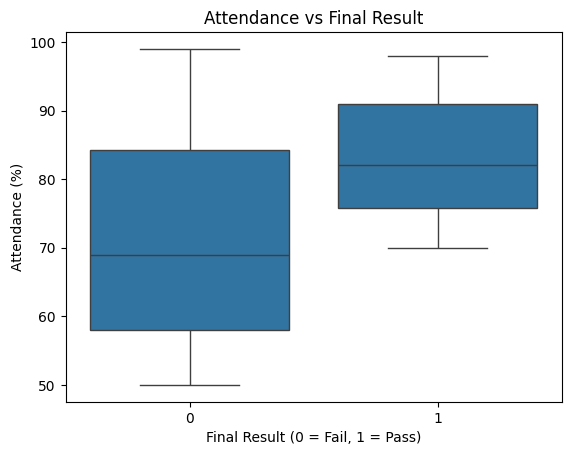

In [12]:
#Attendance VS Final Result
plt.figure()
sns.boxplot(x='final_result', y='attendance', data=df)
plt.title('Attendance vs Final Result')
plt.xlabel('Final Result (0 = Fail, 1 = Pass)')
plt.ylabel('Attendance (%)')
plt.show()


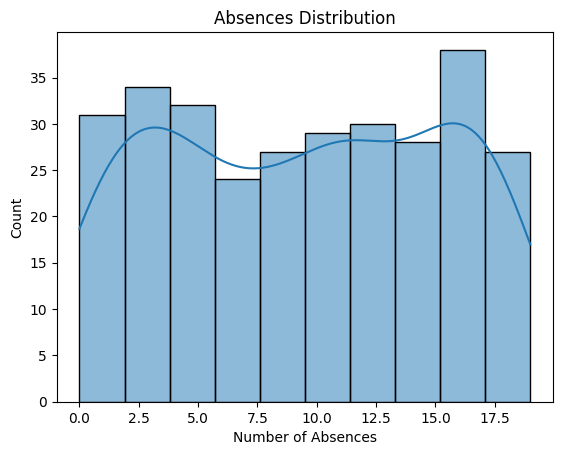

In [13]:
#Attendace Distribution
plt.figure()
sns.histplot(df['absences'], kde=True)
plt.title('Absences Distribution')
plt.xlabel('Number of Absences')
plt.show()


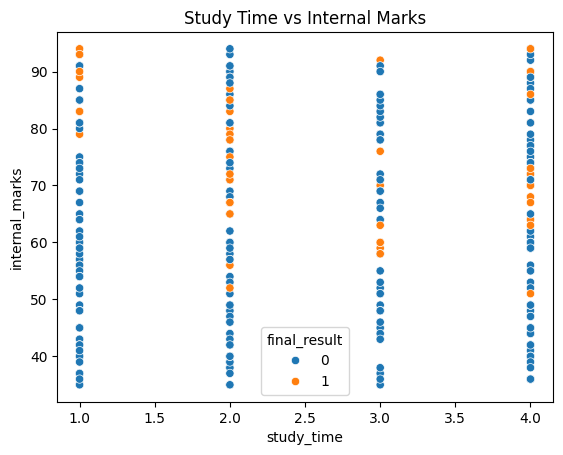

In [14]:
#Study Time VS Internal Mark
plt.figure()
sns.scatterplot(x='study_time', y='internal_marks', hue='final_result', data=df)
plt.title('Study Time vs Internal Marks')
plt.show()


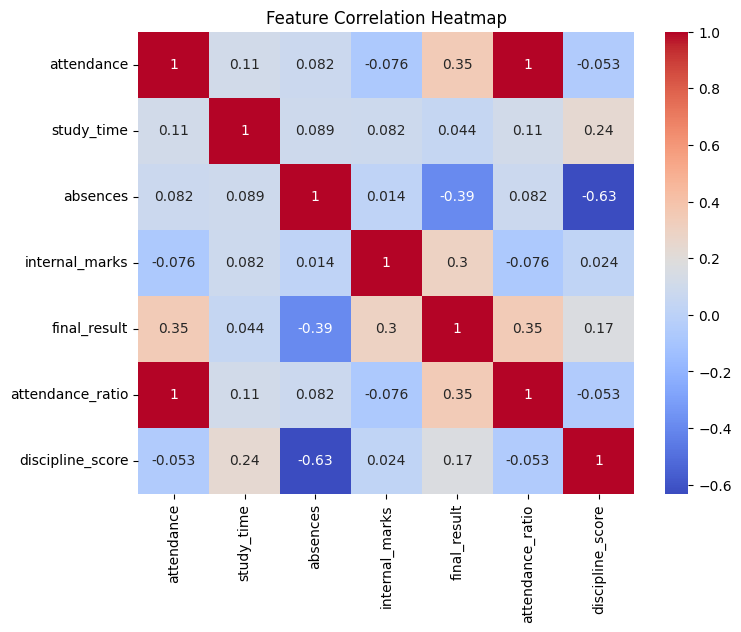

In [15]:
#Corelation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Train-Test Split

In [16]:
X = df.drop('final_result', axis=1)
y = df['final_result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Random Forest Model

In [17]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Evaluation

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Confusion Matrix

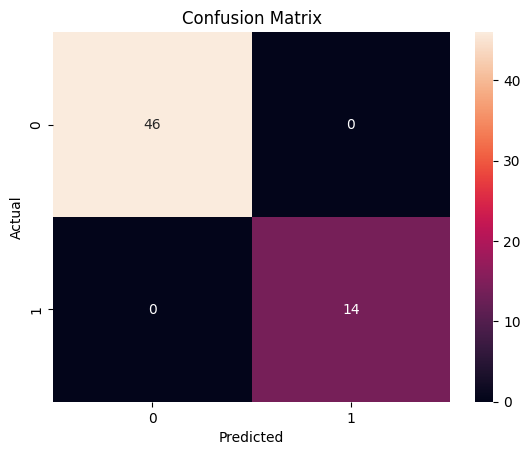

In [19]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance

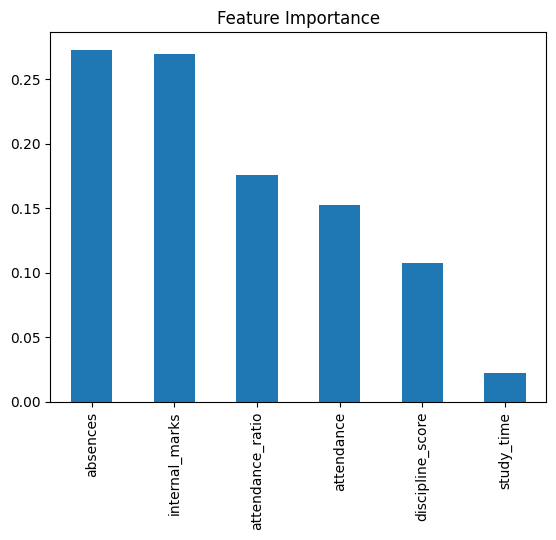

In [21]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance
plt.figure()
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


Dropout Risk Level

In [22]:
df['risk_level'] = np.where(
    df['attendance'] < 65, 'High Risk',
    np.where(df['attendance'] < 80, 'Medium Risk', 'Low Risk')
)

df[['attendance', 'risk_level']].head()


,attendance,risk_level
0,88,Low Risk
1,78,Medium Risk
2,64,High Risk
3,92,Low Risk
4,57,High Risk


In [24]:
print("""
EduGuard analyzes academic and behavioral data to identify students at risk of poor performance or dropout.
EDA revealed attendance and absences as key indicators of academic success.
The trained machine learning model demonstrates reliable performance and provides explainable insights,
supporting early intervention and data-driven decision-making in educational institutions.
""")



EduGuard analyzes academic and behavioral data to identify students at risk of poor performance or dropout.
EDA revealed attendance and absences as key indicators of academic success.
The trained machine learning model demonstrates reliable performance and provides explainable insights,
supporting early intervention and data-driven decision-making in educational institutions.

